# Informed Search, Adversarial Search, Games


**_Author: Jessica Cervi_**

**Expected time = 2 hours**

**Total points = 90 points**


    
## Assignment Overview

In this assignment, you will become more familiar with another type of informed search algorithm: the Dijkstra algorithm. In the first part of the assignment, you will implement your own version of the algorithm and then you will compare the performance with the `networkx` implementation of it. 
The second part of the assignment is dedicatedto adversial search algorithms. Adversarial search is an algorithm where there is an "enemy" or "opponent" changing the state of the problem every step in a direction you do not want. 
After learning the basic components of a `game`, we will test your knowledge with the implementation of the game tic-tac-toe.


This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from the module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are expicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 

### Learning Objectives

- Write Python codes for informed search, adversarial search, and stochastic games
- Understand and implement the Dijkstra algorithm
- Complete the search algorithm using Dijkstra from the `netwrokx` library 
- Understand the concept of a game, game representation, and game tree
- Implemement a simple game in Python


---

## Index: 

####  Informed Search, Adversarial Search, Games

- [Question 1](#q01)
- [Question 2](#q02)
- [Question 3](#q03)
- [Question 4](#q04)
- [Question 5](#q05)
- [Question 6](#q06)
- [Question 7](#q07)
- [Question 8](#q08)
- [Question 9](#q09)
- [Question 10](#q10)
- [Question 11](#q11)
- [Question 12](#q12)
- [Question 13](#q13)

## Informed Search, Adversarial Search, Games

### Pathfinding with Dijkstra - Background

The first part of this assignment explores applications of path finding through a algorithm: **Dijkstra's**.

Dijsktra's algorithm was developed in the 1950s and bears the name of its first author, Edgar Dijkstra.  Dijkstra was working on experiments with Shakey the robot and autonomous transportation.  Dijkstra later recounted that he invented the algorithm in 20 minutes while resting on a walk. 


In [1]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

### Weighted graphs

To get started, we'll consider graphs with *weighted edges*; that is, given a graph, we can associate with each edge numerical weights (or even other kinds of data). Weighted graphs obviously have great utility in transportation or communication networks. An obvious interpretation of numerical edge weights is distance (e.g., lengths of flight paths or roads in a transportation network) but they could have other interpretations (e.g., capacity of a connection in a communication network, etc.).

<center>
<img src = assets/basic_graph.png>
</center>

In the image above, for example, the edge $(a,b)$ has weight 3 and the edge $(a,d)$ has weight 1. Remember, edges can be represented as tuples of vertices (in a directed graph, the order of the vertices tells the direction of the edge). When looking for paths in a weighted graph, the edge weights modify the notion of path length and hence alter the determination of efficient routes in a graph.

To deal with weighted graphs programmatically, we need to have programmatic representations. In Python, one straightforward representation uses a **dictionary of dictionaries** (extending the version of a dictionary of lists from the last assignment). In this case, the keys at the first level represent the nodes, and the values are dictionaries whose keys are adjacenct vertices and whose values are the weights associated with the edge connecting the two vertices. For example, in the graph above, we would represent vertex `a` as:

```python
{'a': {'b': 3, 'd': 1}}
```

Again, for undirected graphs, there can be redundancy in such a representation in deciding whether to represent, for example, the edge connecting vertices `a` and `b` in both the dictionaries associated with vertices `a` and `b`.

[Back to top](#Index:) 
<a id='q01'></a>


### Question 1:

*5 points*

Construct a dictionary of dictionaries to represent the graph in this figure.

<center>
<img src = assets/basic_graph.png>
</center>

+ Save the result as `ans_1`.
+ You don't have to worry about the repeating edges, i.e., if you have already described the edge connecting `a` and `b` in the dict for `a`, you need not describe that edge again in the dict for `b` (but it is acceptable if you do).
+ Every vertex should be represented as a key of the outermost dict.

In [5]:
graph = {
    'a':{'b':3,'d':1},
    'b':{'a':3,'c':2},
    'c':{'f':5,'b':2},
    'd':{'e':8,'f':12,'a':1},
    'e':{'f':4,'d':8},
    'f':{'e':4,'d':12,'c':5}}

ans_2a =  {'a': {'b': 3, 'd': 1},
         'b': {'c': 2},
         'c': {'f': 5},
         'd': {'e': 8, 'f': 12},
         'e': {'f': 4}}

In [52]:
### GRADED

### YOUR SOLUTION HERE:
graph = {
    'a':{'b':3,'d':1},
    'b':{'a':3,'c':2},
    'c':{'f':5,'b':2},
    'd':{'e':8,'f':12,'a':1},
    'e':{'f':4,'d':8},
    'f':{'e':4,'d':12,'c':5}}

ans_1 = graph
###
### YOUR CODE HERE
###


In [53]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
G = ans_1 # Preserving result in more convenient identifier


[Back to top](#Index:) 
<a id='q02'></a>


### Question 2:

*5 points*

`NetworkX` is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Implementing a weighted graph with `networkx` involves adding a key `weight` within our dictionary.  For example, as we first represented the vertex `a`:

```python
'a': {'b':  3, 'd':  1}
```

We will add another layer of nested dictionaries that read as `{'weight': value}`.  For example, vertex `a` becomes:

```python
'a': {'b': {'weight': 3}, 'd': {'weight': 1}
```
This is the expected form of input for the `networkx` function `from_dict_of_dicts`.

Your task is to modify the definition of `ans_2a` below to be consistent with the requirements for `networkx`'s `from_dict_of_dicts`.
```python
ans_2a =  {'a': {'b': 3, 'd': 1},
         'b': {'c': 2},
         'c': {'f': 5},
         'd': {'e': 8, 'f': 12},
         'e': {'f': 4}}
```
+ Modify the definition of `ans_2a` by adding an internal layer of `dict`s with the key `weight` associated with the corresponding numerical values.
+ Apply `nx.from_dict_of_dicts` to `ans_2a` and assign the result to `ans_2b`.

In [54]:
### GRADED

### YOUR SOLUTION HERE:
ans_2a = {'a': {'b':{'weight':3}, 'd':{'weight':1}},
         'b': {'c':{'weight':2}},
         'c': {'f':{'weight':5}},
         'd': {'e':{'weight':8}, 'f':{'weight':12}},
         'e': {'f':{'weight':4}}}
ans_2b = nx.from_dict_of_dicts(ans_2a)
###
### YOUR CODE HERE
###


In [55]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Dijkstra's Algorithm

Now that we know how to work with weighted edges, we can look for *shortest paths* in a graph (treating the weights as distances). The problem that Dijkstra's algorithm aims to solve is simple: you want start at vertex $A$ in a graph and traverse an efficient path (as measured by summing edge weights) to terminate at some different vertex $B$.  Dijkstra suggested the following:

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the *unvisited set*.

2. Assign to every node a tentative distance value from $A$: set it to $0$ for the initial node and to $+\infty$ for all other nodes. Set the initial node as the *current* node.
<a id="dijkstra-3"></a>
3. For the current node, consider all unvisited neighbours. Calculate their tentative distances to $A$ through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node $X$ is marked with a distance of 6 from $A$, and the edge connecting $X$ with a neighbor $Y$ has length 2, then the distance from $Y$ to $A$ through $X$ will be 6 + 2 = 8. If $X$ was previously marked with a distance greater than 8, then change it to 8. Otherwise, keep the current value.

4. When we are done considering all of the unvisited neighbors of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.

5. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3

This animated gif (from [Wikipedia Commons](https://commons.wikimedia.org/wiki/Main_Page)) demonstrates the algorithm in action.

<center>
<img src = "assets/Dijkstras_progress_animation.gif" />
    </center>
    
You will walk through these steps to build your own implementation of Dijkstra's algorithm in a Python function. Following that, you will explore its implementation in the `networkx` library.

[Back to top](#Index:) 
<a id='q03'></a>


### Question 3:

*10 points*

Your first task is to complete the missing lines in the Python function `setup_dijkstra` so that the appropriate output is returned:
```python
def setup_dijkstra(start):
    '''Initialize data structures for Dijkstra's algorithm
    INPUT:
      start: label of initial vertex
    OUTPUT:
      D: Dict of distances: initialize with start->0
      P: Dict for predecessors (traversal tree, initially empty)
      Q: Priority queue (list) of tuples of form (distance, vertex)
         Initialize with tuple (0, start)
      S: Set for visited vertices (initially empty)
    '''
    D = ...
    P = ...
    Q = ...
    S = ...
    return D, P, Q, S
```

+ The input to `setup_dijkstra` is the label `start` of the initial node.
+ The four Python objects `setup_dijkstra` returns are:
  - `D`: a dictionary to store distances to each vertex;
  - `P`: a dictionary to represent a traversal tree (initially empty);
  - `Q`: a queue (list) to store nodes to visit; and
  - `S`: a set to store visited nodes (initially empty).
+ Dijkstra's algorithm begins with a starting vertex whose distance from itself is *zero*. Use this fact to initialize `D` and `Q` within `setup_dijkstra` (both of which have non-empty values).

In [56]:
### GRADED

def setup_dijkstra(start):
    '''Initialize data structures for Dijkstra's algorithm
    INPUT:
      start: label of initial vertex
    OUTPUT:
      D: Dict of distances: initialize with start->0
      P: Dict for predecessors (traversal tree, initially empty)
      Q: Priority queue (list) of tuples of form (distance, vertex)
         Initialize with tuple (0, start)
      S: Set for visited vertices (initially empty)
    '''
    D = {start:0}
    P = {}
    Q = [(0,start)]
    S = set()
    return D,P,Q,S
###
### YOUR CODE HERE
###


In [57]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


You may notice in this Python implementation of `setup_dijkstra`, the dictionary `D` of putative distances is initialized with only one key-value pair (that for the vertex `start` being distance `0` from itself). In Dijkstra's algorithm, the initial state has all vertices being at distance $+\infty$ from the `start` vertex except `start` (which is at distance `0` from itself). This is most simply implemented in Python using [the `dict` method `get`](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict):

> **`get`**`(`*`key[, default]`*`)`
>
>    Return the value for *`key`* if *`key`* is in the dictionary, else *`default`*. If *`default`* is not given, it defaults to `None`, so that this method never raises a `KeyError`.

Thus, in our context, with the dictionary `D` storing putative distances of vertices to the initial vertex `start`, the invocation `D.get(V,float('inf'))` works as required. Intuitively, this means that our first steps would certainly be an improvement on infinite distance. Whenever a node is found to be at distance $+\infty$ from `start`, its distance can be updated (if a shorter path is found) and the corrected distance pushed into the heap.

### Relaxation

The function `relax_dijkstra` provided below implements the [third step](#dijkstra-3) of Dijkstra's algorithm described above. The Python dictionary `get` method discussed above is used to advantage for the underlying logic. The inputs needed are:

+ a graph `G` represented a dictionary of dictionaries with weights (i.e., as in Question 1 rather than as in Question 2).
+ two vertices `u` and `v`
+ the distance & predecessor dicts `D` and `P` as provided by `setup_dijkstra`.

Practically, the relaxation function is used to explore all neighbors of a vertex, and to track the weights of edges traversed to its neighbors. The dictionaries `D` and `P` are updated in place, so calling `relax_dijkstra` at every vertex until reaching the goal builds up the shortest paths.

In [58]:
def relax_dijkstra(G, start, neighbor, D, P):
    '''
    This function updates the distance & predecessor dictionaries
    D & P by comparing their putative distances to the start vertex.
    ------
    G: Graph as dict of dicts
    start: start vertex
    neighbor: neighbor vertex
    D: dict of dicts keeping track of distances
    P: predecessor dictionary to track shortest path trees
    '''
    # Convenient shorthand for infinity
    inf = float('inf')
    # Shortcut estimate
    d = D.get(start, inf) + G[start][neighbor]
    # Compare shortcut to existing distance
    if d < D.get(neighbor, inf):
        # Update D and P accordingly
        D[neighbor], P[neighbor] = d, start
        print(D, P)
        return True

In [59]:
G = {'a': {'b': 3, 'd': 1},
     'b': {'a': 3, 'c': 2},
     'c': {'b': 2, 'f': 5},
     'd': {'a': 1, 'e': 8, 'f': 12},
     'e': {'d': 8, 'f': 4},
     'f': {'c': 5, 'd': 12, 'e': 4}}

In [60]:
### Implementing on our graph
P = {}
for u in G:
    for v in G[u]:
        relax_dijkstra(G, u, v, {u: 0}, P)

{'a': 0, 'b': 3} {'b': 'a'}
{'a': 0, 'd': 1} {'b': 'a', 'd': 'a'}
{'b': 0, 'a': 3} {'b': 'a', 'd': 'a', 'a': 'b'}
{'b': 0, 'c': 2} {'b': 'a', 'd': 'a', 'a': 'b', 'c': 'b'}
{'c': 0, 'b': 2} {'b': 'c', 'd': 'a', 'a': 'b', 'c': 'b'}
{'c': 0, 'f': 5} {'b': 'c', 'd': 'a', 'a': 'b', 'c': 'b', 'f': 'c'}
{'d': 0, 'a': 1} {'b': 'c', 'd': 'a', 'a': 'd', 'c': 'b', 'f': 'c'}
{'d': 0, 'e': 8} {'b': 'c', 'd': 'a', 'a': 'd', 'c': 'b', 'f': 'c', 'e': 'd'}
{'d': 0, 'f': 12} {'b': 'c', 'd': 'a', 'a': 'd', 'c': 'b', 'f': 'd', 'e': 'd'}
{'e': 0, 'd': 8} {'b': 'c', 'd': 'e', 'a': 'd', 'c': 'b', 'f': 'd', 'e': 'd'}
{'e': 0, 'f': 4} {'b': 'c', 'd': 'e', 'a': 'd', 'c': 'b', 'f': 'e', 'e': 'd'}
{'f': 0, 'c': 5} {'b': 'c', 'd': 'e', 'a': 'd', 'c': 'f', 'f': 'e', 'e': 'd'}
{'f': 0, 'd': 12} {'b': 'c', 'd': 'f', 'a': 'd', 'c': 'f', 'f': 'e', 'e': 'd'}
{'f': 0, 'e': 4} {'b': 'c', 'd': 'f', 'a': 'd', 'c': 'f', 'f': 'e', 'e': 'f'}


Notice that we have added a `print()` statement so that the distance and predecessor dictionary can be viewed.  The first two lines can be understood as first consider the edge `ab` of distance 3.  However, because the dge `ad` is shorted (it has distance 1), we need to update our information about the closest adjacent vertex.

<center>
    <img src = 'assets/relax.png'/>
    </center>

Below, we redefine our `relax_dijkstra` function so that we can use without the print statement.

In [61]:
def relax_dijkstra(G, start, neighbor, D, P):
    '''
    This function updates the distance & predecessor dictionaries
    D & P by comparing their putative distances to the start vertex.
    ------
    G: Graph as dict of dicts
    start: start vertex
    neighbor: neighbor vertex
    D: dict of dicts keeping track of distances
    P: predecessor dictionary to track shortest path trees
    '''
    # Convenient shorthand for infinity
    inf = float('inf')
    # Shortcut estimate
    d = D.get(start, inf) + G[start][neighbor]
    # Compare shortcut to existing distance
    if d < D.get(neighbor, inf):
        # Update D and P accordingly
        D[neighbor], P[neighbor] = d, start
        return True

### Working with a Priority Queue (Heap)

The last piece required to implement Dijkstra's algorithm is a *heap* or *priority queue* to maintain the vertices visited. This data structure permits easy retrieval of the vertex with the lowest distance from the `start` vertex. In Python, the queue is maintained as a list of tuples of the form `(distance, vertex)`. The [Python built-in module `heapq`](https://docs.python.org/3/library/heapq.html) contains functions like `heappush` & `heappop` to add items to and remove items from a priority queue cleanly. Notably, when invoking `heappop`, the item with the lowest pirority (or distance in this case) will be removed before all others. When invoking `heappush`, items are added to the queue while maintaining a structure to enable easy retrieval of the smallest item.

Here is an illustrative example from the [`heapq` module documentation](https://docs.python.org/3/library/heapq.html#basic-examples)

In [62]:
from heapq import heappush, heappop

In [63]:
h = []
heappush(h, (5, 'write code'))
heappush(h, (7, 'release product'))
heappush(h, (1, 'write spec'))
heappush(h, (3, 'create tests'))
heappop(h)

(1, 'write spec')

[Back to top](#Index:) 
<a id='q04'></a>


### Question 4:

*10 points*

The purpose of this question preceding is to gain familiarity with the mechanics of using the function `heappop` and working with a priority queue.

Complete the function `visited_or_not` (as shown below) using `heappop` (as illustrated above).
+ The inputs are the priority queue `Q` of vertices to visit with tentative distances to the start and the set `S` of vertices visited.
+ There are no outputs (it returns `None`) but it *does* modify both inputs in-place.
+ Your task is to complete the interior of the `while` loop.
```python
def visited_or_not(Q, S):
    '''
    Builds up set S of visited vertices using priority queue Q.
    INPUT:
      Q: Priority queue (list) of tuples of form (distance, vertex)
      S: Set for visited vertices
    OUTPUT:
      None: WARNING, this modifies Q & S in-place!
    '''    
    while Q:
        # pop a (distance, vertex) tuple from priority queue Q
        # if the vertex is not in S, add it to S
    return None
```


In [64]:
### GRADED

### YOUR SOLUTION HERE
def visited_or_not(Q, S):
    '''
    Builds up set S of visited vertices using priority queue Q.
    INPUT:
      Q: Priority queue (list) of tuples of form (distance, vertex)
      S: Set for visited vertices
    OUTPUT:
      None: WARNING, this modifies Q & S in-place!
    '''
    while Q:
        distance,vertex = heappop(Q)
        if vertex in S:
            continue
        else:
            S.add(vertex)
    return
###
### YOUR CODE HERE
###


In [65]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q05'></a>


### Question 5:

*10 points*

You can finally implement Dijkstra's algorithm.
+ The basic implementation here has most of the pieces provided.
+ The one missing line (within the `for` loop) requires a `heappush`
  to push the updated distance information onto the heap.
 We want to update our queue to reflect the results of the relaxation. Here, we can use the `heappush` function to attach the new information resulting from our relaxation into the queue.

```python
def dijkstra(graph, start):
  '''
  This function implements Dijkstra's algorithm on a graph,
  determining shortest distances from start to all vertices
  in the graph.
  INPUT:
     graph: dict of dicts to represent weighted graph
     start: starting vertex
  OUTPUT:
     D : dict of distances of each vertex to start
     P : dict of predecessors (for paths back to start) 
  Example:
      G = {'a': {'b': 3, 'd': 1},
           'b': {'a': 3, 'c': 2},
           'c': {'b': 2, 'f': 5},
           'd': {'a': 1, 'e': 8, 'f': 12},
           'e': {'d': 8, 'f': 4},
           'f': {'c': 5, 'd': 12, 'e': 4}}
      dijkstra(G, 'a') ====> (D, P) where
        ({'a': 0, 'b': 3, 'c': 5, 'd': 1, 'e': 9, 'f': 10},
         {'b': 'a', 'c': 'b', 'd': 'a', 'e': 'd', 'f': 'c'})
  '''
  D, P, Q, S = setup_dijkstra(start)
  while Q:                              # Unprocessed nodes?
    _, u = heappop(Q)                   # Get closest node
    if u in S: continue                 # If visited skip
    S.add(u)                            # Visit otherwise
    for v in graph[u]:                  # Examine neighbors
      relax_dijkstra(graph, u, v, D, P) # Relax edges
      ### INSERT MISSING LINE HERE
  return D,  P
```
Complete the function dijkstra below. Use the template code above to fill in the body. Your goal is to determine when and what you want to add to the heap!

In [97]:
### GRADED

### YOUR SOLUTION HERE
def dijkstra(graph, start):
    '''
    This function implements Dijkstra's algorithm on a graph,
    determining shortest distances from start to all vertices
    in the graph.
    INPUT:
    graph: dict of dicts to represent weighted graph
    start: starting vertex
    OUTPUT:
    D : dict of distances of each vertex to start
    P : dict of predecessors (for paths back to start) 
    Example:
    G = {'a': {'b': 3, 'd': 1},
         'b': {'a': 3, 'c': 2},
         'c': {'b': 2, 'f': 5},
         'd': {'a': 1, 'e': 8, 'f': 12},
         'e': {'d': 8, 'f': 4},
         'f': {'c': 5, 'd': 12, 'e': 4}}
    dijkstra(G, 'a') ====> (D, P) where
      ({'a': 0, 'b': 3, 'c': 5, 'd': 1, 'e': 9, 'f': 10},
       {'b': 'a', 'c': 'b', 'd': 'a', 'e': 'd', 'f': 'c'})
    '''
    D, P, Q, S = setup_dijkstra(start)
    while Q:
        _, u = heappop(Q)
        if u in S: continue
        S.add(u)
        for v in graph[u]:
            relax_dijkstra(graph, u, v, D, P)
            heappush(Q,(D[v],v))
    return D,  P
###
### YOUR CODE HERE
###


In [67]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Examples of heuristic function are *Euclidean distance* or *Manhattan distance* (defined later).  For instance, in our Romania map example, from the lectures, we could use the straight-line geographic distance between points as the heuristic function.

We will move to implementing these algorithms using the `networkx` library. Now, we will implement `Dijkstra` on a weighted graph representing the Romania map from class.


<img src = 'assets/romania_map.png'>

In [68]:
romania_map = {'Arad': {'Sibiu': {'weight':140}, 'Timisoara': {'weight':118}, 'Zerind': {'weight':75}},
 'Bucharest': {'Fagaras': {'weight':211}, 'Giurgiu': {'weight':90}, 'Pitesti': {'weight':101}, 'Urziceni': {'weight':85}},
 'Craiova': {'Drobeta': {'weight':120}, 'Pitesti': {'weight':138}, 'Rimnicu': {'weight':146}},
 'Drobeta': {'Mehadia': {'weight':75}},
 'Eforie': {'Hirsova': {'weight':86}},
 'Fagaras': {'Sibiu': {'weight':99}},
 'Hirsova': {'Urziceni': {'weight':98}},
 'Iasi': {'Neamt': {'weight':87}, 'Vaslui': {'weight':92}},
 'Lugoj': {'Mehadia': {'weight':70}, 'Timisoara': {'weight':111}},
 'Oradea': {'Sibiu': {'weight':151}, 'Zerind': {'weight':71}},
 'Pitesti': {'Rimnicu': {'weight':97}},
 'Rimnicu': {'Sibiu': {'weight':80}},
 'Urziceni': {'Vaslui': {'weight':142}}}

romania_graph = nx.from_dict_of_dicts(romania_map)

[Back to top](#Index:) 
<a id='q06'></a>


### Question 6:

*5 points*

Your task here is to apply Dijkstra's algorithm as implemented in `networkx` to the graph `romania_graph`.

+ Determine the shortest path from `Arad` to `Bucharest` using the function [`nx.dijkstra_path`](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path.html) from `networkx`.
+ Assign the resulting path to `ans_6`.

In [69]:
### GRADED

### YOUR SOLUTION HERE
ans_6 = nx.dijkstra_path(romania_graph,'Arad','Bucharest',weight='weight')
###
### YOUR CODE HERE
###
### Verification:
print('Shortest path from Arad to Bucharest:\n{}'.format(ans_6))

Shortest path from Arad to Bucharest:
['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']


In [70]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Road network from Sioux Falls

As a next example, we have a road network from Sioux Falls, Iowa. You can find more data on transportation networks [here](https://github.com/bstabler/TransportationNetworks). 

The code below was adapted from the networkx tutorial [here](http://avinashu.com/tutorial/pythontutorialnew/NetworkXBasics.html).  

This is simply to demonstrate a path search algorithm using real data to determine a shortest path.

In [71]:
# READ IN DATA ON NODES AND EDGES
G3 = nx.DiGraph() # a *directed* graph
with open("data/SiouxFalls_flow.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    while len(line):
        l = line.split()
        fromnode = int(l[0])
        to = int(l[1])
        volume = float(l[2])
        cost = int(float(l[3]))
        G3.add_edge(fromnode, to, weight = cost)
        line = f.readline()

In [72]:
with open("data/SiouxFalls_node.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    while len(line):
        line = line.strip(';')
        l = line.split()
        node = int(l[0])
        pos1 = float(l[1])/10000
        pos2 = float(l[2])/10000
        G3.add_node(node, pos=(pos1,pos2))
        line = f.readline()

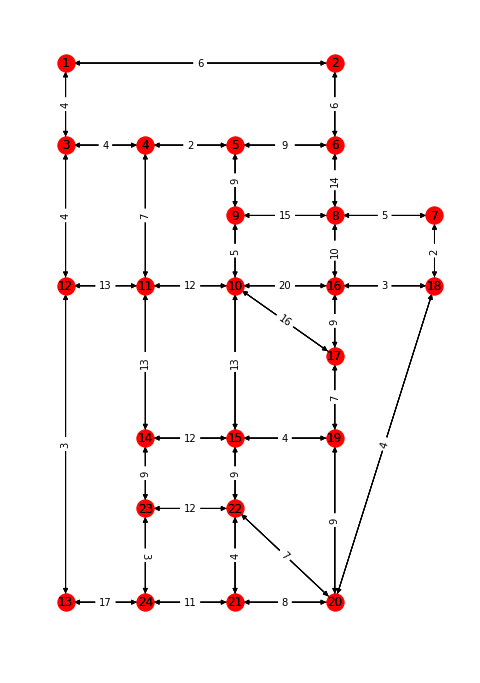

In [73]:
# CREATE PLOT OF NETWORK
plt.figure(figsize=(8,12))
# The positions of each node are stored in a dictionary
node_pos=nx.get_node_attributes(G3,'pos')
# The edge weights of each arcs are stored in a dictionary
arc_weight=nx.get_edge_attributes(G3,'weight')
# Determine the shortest path
sp = nx.dijkstra_path(G3,source = 1, target = 20)
# Create a list of arcs in the shortest path using the zip command and store it in red edges
red_edges = list(zip(sp,sp[1:]))
# Draw the nodes
nx.draw_networkx(G3, node_pos)
# Draw the node labels
nx.draw_networkx_labels(G3, node_pos)
# Draw the edges
nx.draw_networkx_edges(G3, node_pos)
# Draw the edge labels
nx.draw_networkx_edge_labels(G3, node_pos, edge_labels=arc_weight)
# Remove the axis
plt.axis('off');

[Back to top](#Index:) 
<a id='q07'></a>


### Question 7:

*5 points*

Use the `networkx` object `G3` just created to compute the following. 
+ Apply `nx.dijkstra_path` to determine a shortest path from node `13` to node `6`. Assign the result to `ans_7_path`.
+ Apply `nx.dijkstra_path_length` to determine the *length* of the shortest path from node `13` to node `6`. Assign the result to `ans_7_length`.

In [74]:
### GRADED

### YOUR SOLUTION HERE:
ans_7_path = nx.dijkstra_path(G3,13,6)
ans_7_length = nx.dijkstra_path_length(G3,13,6)
###
### YOUR CODE HERE
###


In [75]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# Adversarial Search

---
In this section, we will introduce problems motivated by the example of tic-tac-toe in the lecture and *Chapter 5: Artificial Intelligence a Modern Approach*. Your goal will be to examine some foundational elements of the problems much as those addressed in our search problems in the last module, in the context of adversarial search problems.  To begin, we will explore some of the fundamental ideas in **game theory** and its history.  

According to Straffin's *Game Theory and Strategy*, a **game** is any scenario in which:

<div class="alert alert-info" role="alert">
    <li>There are at least two <i>players</i></li>
    <li>Each player has a number of possible <i>strategies</i></li>
    <li>The strategies chosen by each player determine the <i>outcome</i> of the game.</li>
    <li>Associated to each possible outcome of the game, is a collection of numerical <i>payoffs</i>, one to each player.</li>
</div>


To begin, lets consider a scenario in which there are two players: Row and Column.  The players each have two strategies -- $A$ or $B$. There are different consequences for the four possible pairings of these strategies depending, and we can represent an example of such a game with a *pay-off matrix* as follows:

<table class="table">
    <caption>Row vs. Column</caption>
  <thead>
    <tr>
      <th scope="col"> </th>
      <th scope="col">A</th>
      <th scope="col">B</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">A</th>
      <td>4</td>
      <td>-3</td> 
    </tr>
    <tr>
      <th scope="row">B</th>
      <td>0</td>
      <td>3</td>
    </tr> 
  </tbody>
</table>


This table is from only the Row player's perspective, and we will view each outcome for player Row to have the equal and opposite outcome or *pay-off* for player Column. To begin our exploration, we need first to represent and simulate playing the game a variety of times to verify our intuitions.

### Representation of Games

To start, we will use nested lists to represent games.  A **nested list** is a list of lists in Python.  For example:

```python
[[1,0],[0,1]]
```

could be interpreted as a matrix

$$\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
$$

<a id="q-representing-games"></a>
[Return to top](#questions)

[Back to top](#Index:) 
<a id='q08'></a>


### Question 08:

*5 points*

Your first task is to represent the following pay-off matrix in Python as a list of lists:

| $\ $ |  A  |  B  |  C  |  D  | 
| ----- | ----- | ----- | ----- | ----- |
| **A**     | 12    | -1   |   1 |    0 |
| **B**      |    5 |    1 |   7 |   -20 |
| **C**   |    3 |    2 |    4 |    3 | 
| **D**    |   -16 |   0 |   0 |    16 | 

+ Each inner list corresponds to a row of the table above.
+ Assign your resulting data structure to the identifier `ans_8`.

In [76]:
### GRADED

### YOUR ANSWER BELOW:
pom = [
    [12,-1,1,0],
    [5,1,7,-20],
    [3,2,4,3],
    [-16,0,0,16]]
ans_8 = pom

###
### YOUR CODE HERE
###


In [77]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q09'></a>


### Question 09:

*5 points*

You can now examine the pay-offs in the table from Question 8 to determine if the game is fair.
+ If the game corresponding to the table is fair, the expectation for each player would be equal.
+ Provide your answer as a Python string chosen from
   + `row` (if the row player has an advantage)
   + `column` (if the column player has an advantage)
   + `none` (if neither has an advantage)
+ Assign the result to `ans_9`.

In [78]:
### GRADED


### YOUR ANSWER BELOW:
ans_9 = 'row'
###
### YOUR CODE HERE
###


In [79]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Tic Tac Toe

To demonstrate some of the fundamentals in analyzing a game by building and traversing a game tree, we will use the game of Tic Tac Toe.  We use the game to cover some of the fundamental ideas of connecting games to search problems.  To do so, we will write basic functions to implement the game.  In this section, our functions will focus on:

- An **`initial_state`** function
- A **`player`** function
- An **`action`** function
- A **`result`** function
- A **`terminal_test`** function
- A **`utility`** function

To begin, we need to decide on some conventions for our board.  Let us define a $3 \times 3$ board as a nested list of lists.  Here, we will use empty strings to denote an empty cell.

[Back to top](#Index:) 
<a id='q10'></a>


### Question 10:

*5 points*

Create an empty 3 by 3 game board represented using a nested list of lists of empty strings. Assign your response to the identifier `ans_10`.

In [80]:
### GRADED


### YOUR ANSWER BELOW:
ttoe_board = [
    ['','',''],
    ['','',''],
    ['','','']]

ans_10 = ttoe_board
###
### YOUR CODE HERE
###


In [81]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q11'></a>


### Question 11:

*5 points*

Now, we write a function called initial state that takes no arguments and returns the initial state of the game board. 

```python
def initial_state():
    '''
    This function returns an initial
    empty tic-tac-toe board.
    '''
    return board
```

**HINT:** The initial state of the game is the empty board defined above.

In [82]:
### GRADED

### YOUR ANSWER BELOW:
def initial_state():
    '''
    This function will return an empty game board when
    called.  
    '''
    ini_board = [
    ['','',''],
    ['','',''],
    ['','','']]
    
    return ini_board
###
### YOUR CODE HERE
###


In [83]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**`player`**

Now, we need to write a `player` function.  Here, we assume that player $X$ will always go first.  Our function will then take a board as an argument, and return the Python string `'X'` or `'O'` according to which player's move it is.

Notice that the character returned is in upper case and the character `'O'` is the letter "O" and *not* the number zero.

In [84]:
def player(board):
    '''
    This function takes in a board
    of tic-tac-toe, and determines
    whose move it is
    '''
    x_count = 0
    o_count = 0
    for row in board:
        for column in row:
            if column == 'X':
                x_count += 1
            elif column == 'O':
                o_count += 1
    if x_count == o_count:
        return 'X'
    else:
        return 'O'

**`actions`**

Now that we have a board and a way to determine the player, we want to take in a game board and return a set of all possible actions.  Here, we want to return a set of (row,column) tuples that identify possible moves for a player given the state of the board.

```python
def actions(board):
    ...
    return [(row,column), (row, column), ... ]
```

In [85]:
def actions(board):
    '''
    This function takes in a board and returns the
    a list of tuples of possible next moves.
    '''
    moves = []
    for r, row in enumerate(board):
        for c, val in enumerate(row):
            if val == '':
                moves.append((r, c))
    return set(moves)

In [86]:
board = [['X','X',''],['O','O',''],['','O','X']]
actions(board)

{(0, 2), (1, 2), (2, 0)}

**`result`**

This function should take in a board and (row, column) tuple.  We will return a board having made the move for the appropriate player at the given location.

In [87]:
def result(board, tup):
    '''
    This function takes in a tic tac toe
    board and tuple of row and column location to 
    place the players move
    '''
    p = player(board)
    board[tup[0]][tup[1]] = p
    return board

**`terminal`**

This function will take in a game board and return a boolean value for whether or not the board is in a terminal state (i.e., whether or not any further moves are possible).


In [88]:
def terminal(board):
    '''
    Given a game board, this function
    returns whether or not the board is in
    a terminal state.
    '''
    return not bool(actions(board))

In [89]:
board_1 = [['', '', 'X'],
          ['O', '', ''],
          ['', '', '']]

board_2 = [['X', 'O', 'X'],
          ['O', '', ''],
          ['', 'X', '']]

board_3 = [['X', 'O', 'X'],
          ['O', 'X', 'O'],
          ['O', 'X', 'X']]

print(terminal(board_1))
print(terminal(board_2))
print(terminal(board_3))

False
False
True


In [90]:
board_x = [['', '', 'X'],
          ['O', '', ''],
          ['O', '', ''],
          ['', '', '']]

In [91]:
print(len(board_x))
print(len(board_x[0]))

4
3


For example, the function `row_winners` below, accepts a board as an input and returns `'X'` if player `'X'` has completed a row of the tic-tac-toe board, `'O'` if player `'O'` has completed a row of the tic-tac-toe board, or `None` if neither player has completed a row of the tic-tac-toe board.

In [92]:
def row_winners(board):
    '''Returns "X" or "O" or None according to whether either one of the players
    has achieved three symbols in a horizontal row.'''
    for r, row in enumerate(board):
        x = 0
        y = 0
        for c, val in enumerate(row):
            if val == 'X':
                x = x + 1
            if val == 'O':
                y = y + 1
        if x == 3:
            return 'X'
        if y == 3:
            return 'O'
    return None

[Back to top](#Index:) 
<a id='q12'></a>


### Question 12:

*10 points*

Following the template given by `row_winner()` above, code a function `column_winner` that accepts a board as an input.
This function is similar to our `row_winners` but will determine if one of the players has won column winners by completing a column with their symbol. It should return the winner as `'X'`, `'O'`, or `None`.

In [95]:
### GRADED

###YOUR SOLUTION HERE
def column_winners(board):
    '''Returns "X" or "O" or None according to whether either one of the players
    has achieved three symbols in a vertical column.'''
    n_col = len(board)
    n_row = len(board[0])
    for row in range(n_row):
        x = 0
        o = 0
        for col in range(n_col):
            if board[col][row] == 'X':
                x += 1
            if board[col][row] == 'O':
                o += 1
        if x == 3:
            return 'X'
        if o == 3:
            return 'O'
    return None
###
### YOUR CODE HERE
###


In [94]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q13'></a>


### Question 13:

*10 points*

Code a function `diagonal_winner` that accepts a board as an input.
This function will take in a game board and return whether or not there is a diagonal win.  It should return the winner as `X`, `O`, or `None`.

In [49]:
### GRADED

### YOUR SOLUTION HERE 
def diagonal_winners(board):
    '''Returns "X" or "O" or None according to whether either one of the players
    has achieved three symbols in sequence along either diagonal.'''
    if board[1][1] == board[0][0] and board[1][1] == board[2][2]:
        return board[1][1]
    if board[1][1] == board[0][2] and board[1][1] == board[2][0]:
        return board[1][1]
    return None
###
### YOUR CODE HERE
###


In [50]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The function `utility()` below takes as input a board and return a numerical score (i.e., an integer) as follows:

- If player `'X'` wins, return `+1`
- If player `'O'` wins, return `-1`
- If Nobody wins, return `0` (that's the integer zero, not the alphabetical letter `'O'`)

In [51]:
def utility(board):
    '''Returns +1, -1 or 0 according to whether player X, player O, or neither player
    respectively has won the game.'''
    row_result = row_winners(board)
    col_result = column_winners(board)
    diag_result = diagonal_winners(board)
    if (col_result == 'X') or (row_result == 'X') or (diag_result == 'X'):
        return +1
    elif (col_result == 'O') or (row_result == 'O') or (diag_result == 'O'):
        return -1
    return 0  # Default condition 


### The Game Tree

Congratulations, you now have all the ingredients necessary for building the game tree for tic-tac-toe.  Similar to what we saw in the first assignment, we could represent a tree as a dictionary where each key corresponds to a ply in the game tree and contains the nodes available at that level.

![](assets/tictactoe.png)
